## Week 8 - Text analysis


- Finding the important words in a document (TF-IDF)
- Apply these tricks to understand what different communities in Computational Social Science are working on.

### Part 1 - Exercise 1) 

- TF: Term Frequency
- IDF: Inverse Document Frequency 

a score for measuring the importance of a word in a text. 

We need the network community from week 6 (ex 4)
We need the tokenized abstract dataframe from week 7 (ex 2)

In [1]:
import netwulf as nw
import networkx as nx 
import matplotlib.pyplot as plt 
import pickle

import pandas as pd 
import numpy as np 

In [3]:
with open("data/CSS_graph_W6.pickle", "rb") as file:
    CSS_graph = pickle.load(file)
    
CSS_partition = nx.get_node_attributes(CSS_graph, "group")

In [4]:
network_positions, config = nw.visualize(CSS_graph)

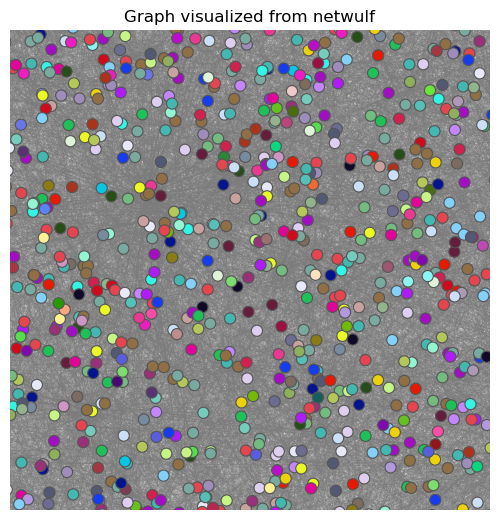

In [5]:
fig, ax = nw.draw_netwulf(network_positions)
plt.title(f"Graph visualized from netwulf")
plt.show()

In [6]:
communities = {}
for node, c in CSS_partition.items(): 
    if c not in communities:
        communities[c] = []
    communities[c].append(node)


Find all abstracts of papers written by a member of community c 

In [22]:
abstract_df = pd.read_csv("data/Abstract_dataframe_W7.csv")
articles_df = pd.read_csv("data/IC2S2_papers.csv")
abstract_df

Unnamed: 0.1  Unnamed: 0                                id  \
0                0           0  https://openalex.org/W2127048411   
1                1           1  https://openalex.org/W2058105398   
2                2           2  https://openalex.org/W3142588439   
3                3           3  https://openalex.org/W2116926372   
4                4           4  https://openalex.org/W2147453867   
...            ...         ...                               ...   
9347          9347        9347   https://openalex.org/W155200242   
9348          9348        9348   https://openalex.org/W170385551   
9349          9349        9349   https://openalex.org/W105761736   
9350          9350        9350  https://openalex.org/W2003425297   
9351          9351        9351   https://openalex.org/W164174688   

                                                  title  \
0                         Community detection in graphs   
1                Statistical physics of social dynamics   
2                         Networks, Crowds, and Markets   
3                     Misinformation and Its Correction   
4     Experimental Study of Inequality and Unpredict...   
...                                                 ...   
9347  “You’re as Sick as You Sound”: Using Computati...   
9348  Predicting Human-Targeted Translation Edit Rat...   
9349  Using discourse context to guide pitch accent ...   
9350  Remarks on ghost projections and ideals in the...   
9351  ASR satisficing: the effects of ASR accuracy o...   

                                abstract_inverted_index  \
0     {'The': [0], 'modern': [1], 'science': [2], 'o...   
1     {'Statistical': [0], 'physics': [1, 79], 'has'...   
2     {'Are': [0, 30], 'all': [1, 32], 'film': [2], ...   
3     {'The': [0], 'widespread': [1], 'prevalence': ...   
4     {'Hit': [0], 'songs,': [1], 'books,': [2], 'an...   
...                                                 ...   
9347  {'Recently,': [0], 'researchers': [1], 'in': [...   
9348  {'In': [0, 102], 'the': [1, 20, 34, 42, 52, 99...   
9349                                                NaN   
9350                                                NaN   
9351  {'We': [0, 26], 'examine': [1], 'how': [2], 'd...   

                                                   text  \
0     The modern science networks brought significan...   
1     Statistical physics proven fruitful framework ...   
2     Are film stars linked Kevin Bacon? Why stock m...   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
9347                                                NaN   
9348  In field machine translation, automatic metric...   
9349                                                NaN   
9350                                                NaN   
9351  We examine differences accuracy Automatic Spee...   

                                                 tokens  
0     ['the', 'modern', 'science', 'networks', 'brou...  
1     ['statistical', 'physics', 'proven', 'fruitful...  
2     ['are', 'film', 'stars', 'linked', 'kevin', 'b...  
3                                                    []  
4                                                    []  
...                                                 ...  
9347                                                 []  
9348  ['in', 'field', 'machine', 'translation', '', ...  
9349                                                 []  
9350                                                 []  
9351  ['we', 'examine', 'differences', 'accuracy', '...  

[9352 rows x 7 columns]

In [23]:
def find_abstract(df, author): 
    if author in df["id"].values:
        abstract = abstract_df.loc[abstract_df['id'] == author]
        return abstract 
    else: 
        return []
    
abstracts_per_community = {}
for community, author_list in communities.items():
    abstracts_per_community[community] = pd.Series(author_list).apply(lambda x: find_abstract(abstract_df, x))

print(abstracts_per_community)

{0: 0      []
1      []
2      []
3      []
4      []
       ..
739    []
740    []
741    []
742    []
743    []
Length: 744, dtype: object, 1: 0      []
1      []
2      []
3      []
4      []
       ..
549    []
550    []
551    []
552    []
553    []
Length: 554, dtype: object, 2: 0      []
1      []
2      []
3      []
4      []
       ..
202    []
203    []
204    []
205    []
206    []
Length: 207, dtype: object, 3: 0      []
1      []
2      []
3      []
4      []
       ..
800    []
801    []
802    []
803    []
804    []
Length: 805, dtype: object, 4: 0      []
1      []
2      []
3      []
4      []
       ..
276    []
277    []
278    []
279    []
280    []
Length: 281, dtype: object, 5: 0      []
1      []
2      []
3      []
4      []
       ..
350    []
351    []
352    []
353    []
354    []
Length: 355, dtype: object, 6: 0      []
1      []
2      []
3      []
4      []
       ..
159    []
160    []
161    []
162    []
163    []
Length: 164, dtype: object, 7: 0      []

In [30]:
five_top_communities = sorted(communities, key=lambda l: len(communities[l]), reverse=True)[:5]
print(five_top_communities)

[3, 0, 9, 11, 1]


Calculate the TF for each word. Find the top 5 terms within the top 5 communities. 

In [45]:

tokens = abstract_df["tokens"]


["['the', 'modern', 'science', 'networks', 'brought', 'significant', 'advances', 'understanding', 'complex', 'systems', '', 'one', 'relevant', 'features', 'graphs', 'representing', 'real', 'systems', 'community', 'structure', '', 'clustering', '', 'i', 'e', 'organization', 'vertices', 'clusters', '', 'many', 'edges', 'joining', 'vertices', 'cluster', 'comparatively', 'edges', 'joining', 'vertices', 'different', 'clusters', '', 'such', 'clusters', '', 'communities', '', 'considered', 'fairly', 'independent', 'compartments', 'graph', '', 'playing', 'similar', 'role', 'like', '', 'e', 'g', '', 'tissues', 'organs', 'human', 'body', '', 'detecting', 'communities', 'great', 'importance', 'sociology', '', 'biology', 'computer', 'science', '', 'disciplines', 'systems', 'often', 'represented', 'graphs', '', 'this', 'problem', 'hard', 'yet', 'satisfactorily', 'solved', '', 'despite', 'huge', 'effort', 'large', 'interdisciplinary', 'community', 'scientists', 'working', 'past', 'years', '', 'we', 

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np 

def calc_tf(text): 
    tf_dict = {}
    for word in text.split():
        tf = text.count(word) / len(text)
        tf_dict[word] = tf 
    return tf_dict 

def calc_texts_with_word(tokens_list, word):
    count = sum(1 for text in tokens_list if word in text)
    return count 

def calc_idf(tokens_list): 
    idf_dict = {}
    for text in tokens_list:
        for word in text.split():
            texts_with_word = calc_texts_with_word(tokens_list, word)

            idf = np.log(len(tokens_list)/texts_with_word)
            idf_dict[word] = idf
    return idf_dict 

tokens = abstract_df["tokens"].tolist()
print(calc_idf(tokens))

most_common_terms = 0 
print("The 5 most common terms are:", most_common_terms)

KeyboardInterrupt: 